In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# path to the database - change it if needed
path = 'C:/Users/Admin/Dev1ce/Downloads/face_data/face_data/'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight','sad', 'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X_original = np.zeros((D, N))
# collect all data
count = 0

Y = []
# there are 15 people
for person_id in range(1, 16):
    for state in states:
        Y.append(state)
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X_original[:, count] = tmp.reshape(D)
        count += 1

165 77760 243 320


In [3]:
Y = np.array(Y)

In [4]:
Y.shape

(165,)

In [5]:
len(states)

11

In [6]:
# Convert label dạng chữ thành dạng số nguyên liên tục khác nhau

dict_y = {'centerlight': 0, 'glasses': 1, 'happy': 2, 'leftlight': 3, 'noglasses': 4, 'normal': 5, 'rightlight': 6,'sad': 7, 'sleepy': 8, 'surprised': 9, 'wink': 10}

y_encoded = list(map(dict_y.get, Y))
y_encoded = np.array(y_encoded)

In [7]:
Y

array(['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy', 'leftlight', 'noglasses',
       'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink',
       'centerlight', 'glasses', 'happy',

In [8]:
y_encoded

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
X_original.shape, y_encoded.shape

((77760, 165), (165,))

In [12]:
X = StandardScaler().fit_transform(X_original.T)
pca = PCA(n_components=100)
result = pca.fit_transform(X)

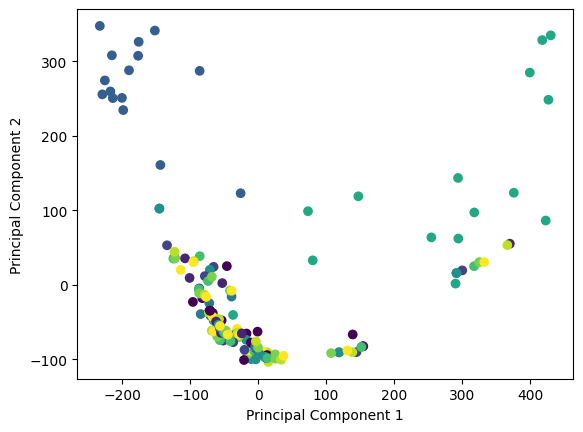

In [13]:
# Hiển thị phân lớp dữ liệu bằng scatter plot
plt.scatter(result[:, 0], result[:, 1], c=y_encoded)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

root = 'C:/Users/Admin/Dev1ce/Downloads/principal-component-analysis-master/principal-component-analysis-master/'
images_csv_path = os.path.join(root, 'images.csv')

images = pd.read_csv(images_csv_path).to_numpy()
class_labels = ['Angry','Disgusted','Fearful','Happy','Sad','Surprised','Neutral']

# Áp dụng phương pháp PCA để giảm chiều dữ liệu xuống còn 2 chiều
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images)


# Trực quan hóa các phân lớp dưới dạng 2D bằng Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), cmap='viridis')
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Trực quan hóa các phân lớp dưới dạng 2D bằng Seaborn
import seaborn as sns
df = pd.DataFrame({'Component 1': X_test[:, 0], 'Component 2': X_test[:, 1], 'Label': clf.predict(X_test)})
sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='Label', palette='viridis')
plt.show()

NameError: name 'X_test' is not defined

<Figure size 800x600 with 0 Axes>

In [2]:
import cv2
import numpy as np

# Đọc ảnh vào
img = cv2.imread('C:/Users/Admin/Dev1ce/Desktop/Linhtinh/179830742_1302674886795347_7035703295244975688_n.jpg')

# Chuyển ảnh sang định dạng ma trận NumPy
matrix = np.array(img)

In [3]:
print(matrix)

[[[ 40   9  10]
  [ 40   9  10]
  [ 40   9  10]
  ...
  [154 216 252]
  [154 216 252]
  [154 216 252]]

 [[ 40   9  10]
  [ 40   9  10]
  [ 40   9  10]
  ...
  [154 216 252]
  [154 216 252]
  [154 216 252]]

 [[ 40   9  10]
  [ 40   9  10]
  [ 40   9  10]
  ...
  [154 216 252]
  [154 216 252]
  [154 216 252]]

 ...

 [[ 50  31   4]
  [ 50  31   4]
  [ 50  31   4]
  ...
  [ 72  46   0]
  [ 77  51   5]
  [ 82  56  10]]

 [[ 51  32   5]
  [ 51  32   5]
  [ 51  32   5]
  ...
  [ 72  46   0]
  [ 73  47   1]
  [ 75  49   3]]

 [[ 51  32   5]
  [ 51  32   5]
  [ 51  32   5]
  ...
  [ 72  46   0]
  [ 71  45   0]
  [ 70  44   0]]]


In [4]:
import cv2

# Đọc ảnh vào dưới dạng grayscale
img_gray = cv2.imread('C:/Users/Admin/Dev1ce/Desktop/Linhtinh/179830742_1302674886795347_7035703295244975688_n.jpg', cv2.IMREAD_GRAYSCALE)

# Chuyển ảnh sang ma trận
matrix = img_gray.astype(float)

# Chuyển ma trận thành danh sách các giá trị pixel
pixels = matrix.reshape(matrix.shape[0] * matrix.shape[1]).tolist()

In [6]:
print(matrix)

[[ 13.  13.  13. ... 220. 220. 220.]
 [ 13.  13.  13. ... 220. 220. 220.]
 [ 13.  13.  13. ... 220. 220. 220.]
 ...
 [ 25.  25.  25. ...  35.  40.  45.]
 [ 26.  26.  26. ...  35.  36.  38.]
 [ 26.  26.  26. ...  35.  34.  33.]]


In [7]:
import sys
from sklearn.decomposition import RandomizedPCA
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

filename = ['C:/Users/Admin/Dev1ce/Desktop/Linhtinh/179830742_1302674886795347_7035703295244975688_n.jpg',
            'C:/Users/Admin/Dev1ce/Desktop/Linhtinh/316367307_1157841031495344_6788552858815711744_n.jpg']

for i in range(0,2):
    img = mpimg.imread('input/' + filename[i])
    print(img.shape)
    plt.axis('off')
    plt.imshow(img)

    img_r = np.reshape(img, (img.shape[0], img.shape[1] * img.shape[2]))
    print(img_r.shape)

    ipca = RandomizedPCA(int(sys.argv[1])).fit(img_r)
    img_c = ipca.transform(img_r)
    print(img_c.shape)
    print(np.sum(ipca.explained_variance_ratio_))

    temp = ipca.inverse_transform(img_c)
    print(temp.shape)

    temp = np.reshape(temp, img.shape)

    print(temp.shape)

    plt.axis('off')
    plt.imshow(temp)
    mpimg.imsave('compressedImages/'+ filename[i],temp)
    plt.show()

ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\__init__.py)

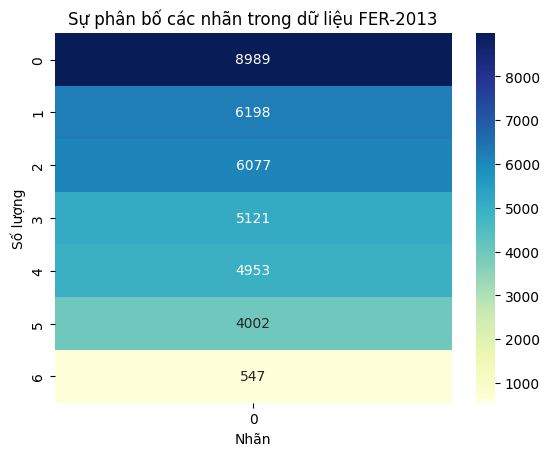

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file csv

data = pd.read_csv('C:/Users/Admin/Dev1ce/Downloads/fer2013.csv/fer2013.csv')
# Tính số lần xuất hiện của mỗi nhãn trong tập dữ liệu
label_counts = data['emotion'].value_counts()

# Chuyển số lần xuất hiện của mỗi nhãn thành một ma trận 2D
label_matrix = label_counts.values.reshape((7, 1))

# Biểu diễn sự phân bố các nhãn bằng biểu đồ heatmap
sns.heatmap(label_matrix, cmap='YlGnBu', annot=True, fmt='g')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Sự phân bố các nhãn trong dữ liệu FER-2013')
plt.show()

In [10]:
# Lấy ra các cột cần thiết
x = data['pixels']
y = data['emotion']

# Biểu diễn sự phân bố của dữ liệu bằng scatter plot
plt.scatter(x, y, s=1)
plt.xlabel('Ảnh')
plt.ylabel('Nhãn')
plt.title('Sự phân bố các nhãn trong dữ liệu FER-2013 bằng scatter plot')
plt.show()

KeyboardInterrupt: 

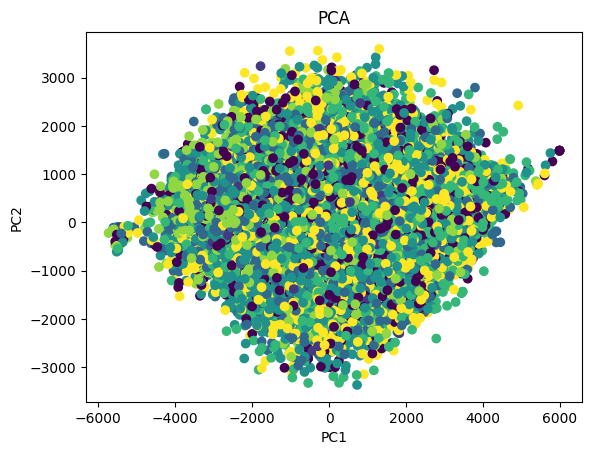

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Chuyển đổi dữ liệu ảnh từ dạng chuỗi thành dạng mảng số
X = data['pixels'].apply(lambda pixel_str: [int(pixel) for pixel in pixel_str.split()]).tolist()

# Áp dụng kỹ thuật PCA để giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tạo một DataFrame mới chứa dữ liệu giảm chiều và nhãn tương ứng
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['emotion'] = data['emotion']

# Biểu diễn dữ liệu giảm chiều bằng scatter plot
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['emotion'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

NameError: name 'scatter' is not defined

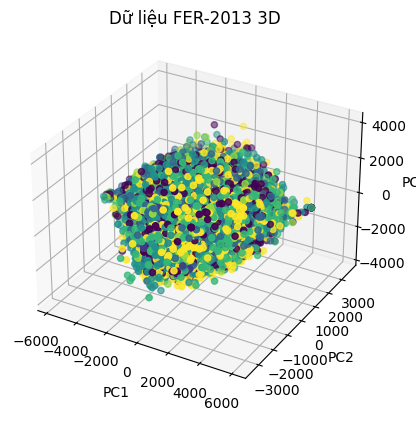

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


# Chuyển đổi dữ liệu ảnh từ dạng chuỗi thành dạng mảng số
X = data['pixels'].apply(lambda pixel_str: [int(pixel) for pixel in pixel_str.split()]).tolist()

# Áp dụng kỹ thuật PCA để giảm chiều dữ liệu xuống 3 chiều
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Tạo một DataFrame mới chứa dữ liệu giảm chiều và nhãn tương ứng
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['emotion'] = data['emotion']

# Biểu diễn dữ liệu giảm chiều bằng scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['emotion'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Dữ liệu FER-2013 3D')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Nhãn')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

data = pd.read_csv('C:/Users/Admin/Dev1ce/Downloads/fer2013.csv/fer2013.csv')

# Chuyển đổi dữ liệu ảnh từ dạng chuỗi thành dạng mảng số
X = data['pixels'].apply(lambda pixel_str: [int(pixel) for pixel in pixel_str.split()]).tolist()

# Áp dụng kỹ thuật PCA để giảm chiều dữ liệu xuống 3 chiều
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Tạo một DataFrame mới chứa dữ liệu giảm chiều và nhãn tương ứng
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['emotion'] = data['emotion']



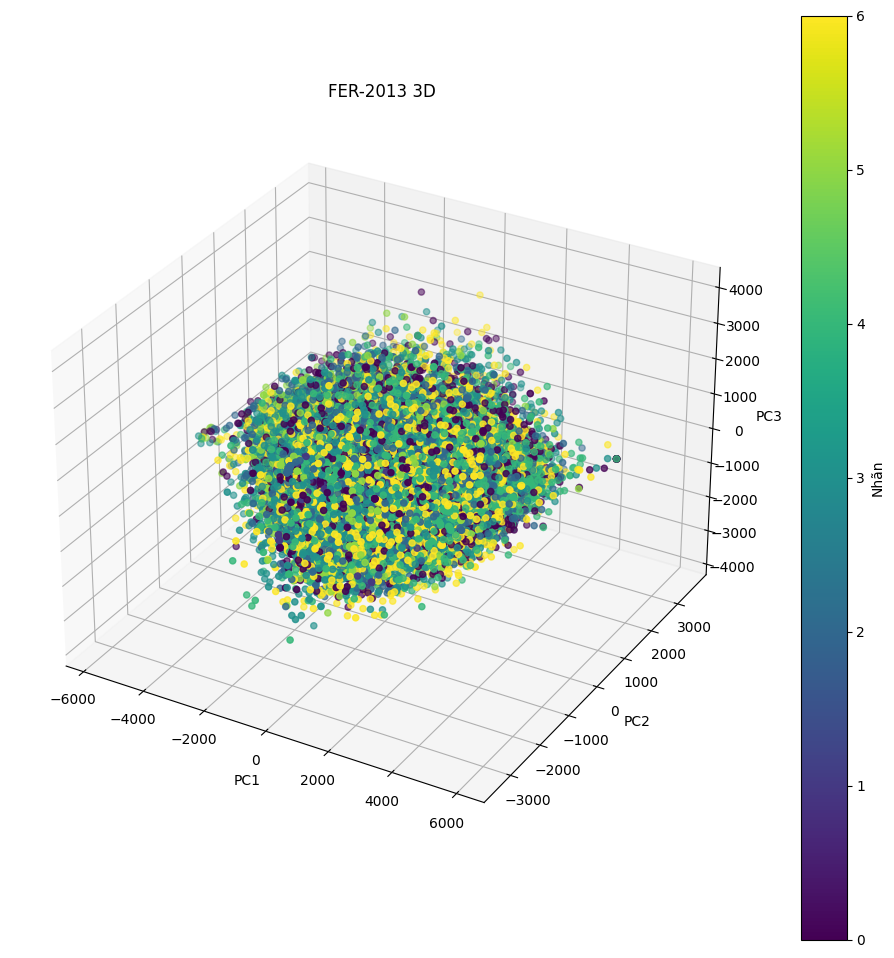

In [20]:
# Biểu diễn dữ liệu giảm chiều bằng scatter plot 3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['emotion'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('FER-2013 3D')

# Thêm colorbar để chú thích màu các điểm dữ liệu
colorbar = plt.colorbar(scatter)
colorbar.set_label('Nhãn')

plt.show()

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
train_dir = 'C:/Users/Admin/Dev1ce/Desktop/XLA-ndcx/fer2013/train/'
test_dir = 'C:/Users/Admin/Dev1ce/Desktop/XLA-ndcx/fer2013/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   4130      667  4172   7422     4965  4914      3420
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


Text(0.5, 1.0, 'Plot of number of images in train dataset')

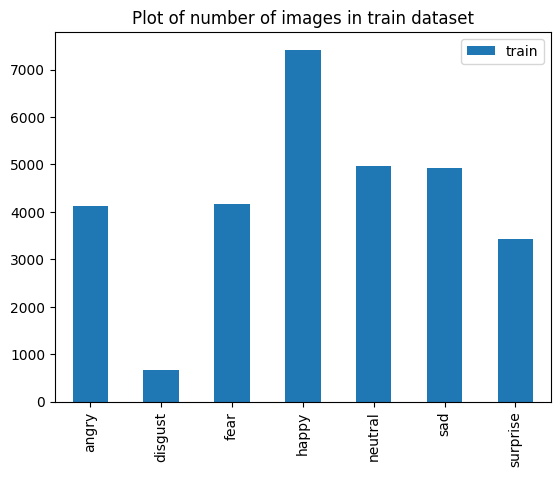

In [4]:
train_count.transpose().plot(kind="bar")
plt.title('Plot of number of images in train dataset')

Text(0.5, 1.0, 'Plot of number of images in test dataset')

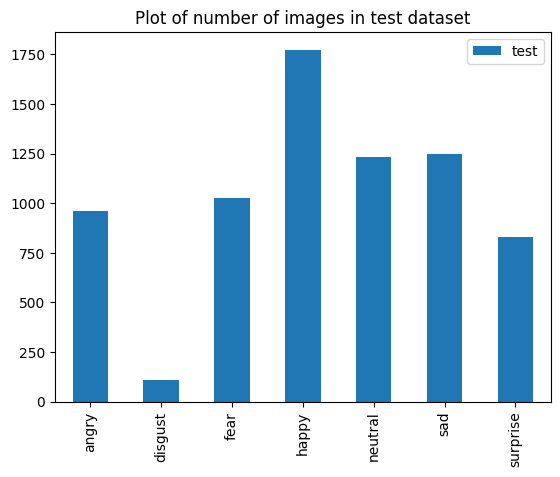

In [5]:
test_count.transpose().plot(kind="bar")
plt.title('Plot of number of images in test dataset')